# Main Libraries for the Project

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Reading the Dataset

In [2]:
trainData = pd.read_csv("/Users/jeremyperez/Jupyter/NSL-KDD/KDDTrain+.csv") 
testData = pd.read_csv("/Users/jeremyperez/Jupyter/NSL-KDD/KDDTest+.csv")
trainData

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21


# Getting the Dependent and independent Variables

In [10]:
#Getting the Dependent and independent Variables
X = trainData.iloc[:,:-2].values # Get all the rows and all the clums except all the colums - 2
Y = trainData.iloc[:,41].values# Get all the rows and the colum number 42
Y

array(['normal', 'neptune', 'normal', ..., 'normal', 'neptune', 'normal'],
      dtype=object)

# Encoding Categorical Data

In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#We use dummy Encoding to pervent the machine learning don't atribute the categorical data in order. 
# Encoding the categorical data

# Encoding the Independent Variable
transform = ColumnTransformer([("1","2","3", OneHotEncoder(), [1,2,3])], remainder="passthrough")
X = transform.fit_transform(X)

# Encoding the Dependent Variable
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

TypeError: unhashable type: 'list'

# K-means

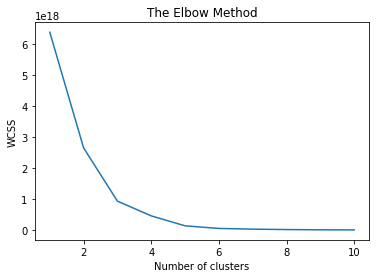

In [5]:
#Getting the Dependent and independent Variables

#Elbow method to find the best number of culster
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300,n_init = 100,random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#5 clusters 

#Applying K-mea(n_clusters = 5)
kmeans = KMeans(n_clusters = 5, init = 'k-means++',max_iter = 300,n_init = 100,random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# Analyzing Results

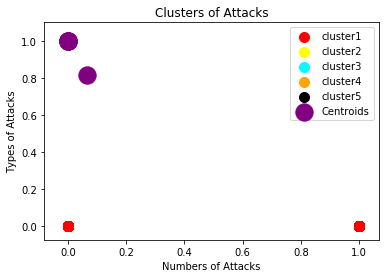

In [6]:
#Visual representation of the clusters
plt.scatter(X[y_kmeans ==0,0],X[y_kmeans == 0,1], s = 100, c = 'red', label = 'cluster1')
plt.scatter(X[y_kmeans ==1,0],X[y_kmeans == 1,1], s = 100, c = 'yellow', label = 'cluster2')
plt.scatter(X[y_kmeans ==2,0],X[y_kmeans == 2,1], s = 100, c = 'cyan', label = 'cluster3')
plt.scatter(X[y_kmeans ==3,0],X[y_kmeans == 3,1], s = 100, c = 'orange', label = 'cluster4')
plt.scatter(X[y_kmeans ==4,0],X[y_kmeans == 4,1], s = 100, c = 'black', label = 'cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],s = 300, c = 'purple', label = 'Centroids')
plt.title('Clusters of Attacks')
plt.xlabel('Numbers of Attacks')
plt.ylabel('Types of Attacks')
plt.legend()
plt.show()

# DBSCAN 
# Finds core samples of high density and expands clusters from them.

In [7]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = X(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

TypeError: 'numpy.ndarray' object is not callable